# Homework4

### 2023级 吕欣萌10222140402

## 题目：寻找关键用户和分析社交关系

### data.json 数据描述

## 问题

### 1. 社交网络构建与分析

In [53]:
# a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
#邻接矩阵法
import numpy as np
import json

# 读取数据
with open("C:/Users/86137/Desktop/hw4_data.json", 'r') as f:
    data = json.load(f)

# 用户节点
users = [user[0] for user in data['nodes']]
num_users = len(users)

# 初始化邻接矩阵
adjacency_matrix = np.zeros((num_users, num_users))

# 边关系
edges = data['edges']

# 填充邻接矩阵
for edge in edges:
    user1, user2, weight = edge
    i = users.index(user1)
    j = users.index(user2)
    adjacency_matrix[i][j] = weight
    adjacency_matrix[j][i] = weight  # 假设是无向图

# 输出邻接矩阵
print("邻接矩阵表示的社交关系网络:")
print(adjacency_matrix)

邻接矩阵表示的社交关系网络:
[[ 0.   25.3  25.09  9.62  2.1   0.    0.    0.    0.    1.14  0.    0.
   0.86 11.85  7.25  2.34  0.    0.    0.    0.    0.    0.    4.25  4.5
   0.    0.    3.11  7.39  3.61  0.    0.  ]
 [25.3   0.   24.84  6.4   0.97  0.    0.    0.    0.    0.    0.    0.
   0.   11.92  6.58  0.    0.    0.    0.    0.    0.    0.    4.55  4.84
   0.    0.    3.27  7.73  3.82  0.    0.  ]
 [25.09 24.84  0.   12.48  3.96  3.27  2.52  2.1   0.    3.56  1.5   0.
   4.11 13.85  8.1   3.86  2.36  0.    1.33  1.09  2.24  0.    4.66  4.97
   0.    0.    3.32  7.63  3.9   1.    2.1 ]
 [ 9.62  6.4  12.48  0.   11.87  9.15  7.73  6.96  6.85 15.28  7.93  6.54
   9.84  7.15  4.1  10.64  7.32  2.32  5.19  7.84  5.09  3.51  3.21  3.35
   4.19  3.05  2.51  3.87  2.83  2.84  2.96]
 [ 2.1   0.97  3.96 11.87  0.    7.62  5.33  8.44  6.84  6.29  9.52  1.51
   6.4   1.77  0.89  5.48  7.29  1.2   6.71  5.92  2.84  1.26  0.84  0.85
   1.34  1.2   0.78  0.88  0.81  1.09  0.89]
 [ 0.    0.    3.27  9.15  

In [54]:
#邻接字典法
import json

# 读取数据
with open("C:/Users/86137/Desktop/hw4_data.json", 'r') as f:
    data = json.load(f)

# 边关系
edges = data['edges']

# 构建邻接字典
adjacency_dict = {}

for edge in edges:
    user1, user2, _ = edge
    if user1 not in adjacency_dict:
        adjacency_dict[user1] = []
    if user2 not in adjacency_dict:
        adjacency_dict[user2] = []
    adjacency_dict[user1].append(user2)
    adjacency_dict[user2].append(user1)  # 假设是无向图

# 输出邻接字典
print("邻接字典表示的社交关系网络:")
for user, friends in adjacency_dict.items():
    print(f"{user}: {friends}")

邻接字典表示的社交关系网络:
Yanyan-Wang: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
andyhuang18: ['tyn1998', 'wj23027', 'will-ww', 'zhicheng-ning', 'lhbvvvvv', 'frank-zsy', 'bifenglin', 'wxharry', 'Zzzzzhuzhiwei', 'stevending1st', 'PureNatural', 'pranavshuklaa', 'pomelo-nwu', 'stealth-bombeer', 'Vlad116', 'kunal8411', 'xgdyp', 'longyanz', 'xiaoya-yaya', 'zhaosj975', 'birdflyi', 'Ya

In [55]:
# b.请找出每个用户的直接朋友，列表列出
import json

# 用户节点
users = {user[0]: user[1] for user in data['nodes']}

# 边关系
edges = data['edges']

# 构建社交网络图
social_network = {user: [] for user in users.keys()}

for edge in edges:
    user1, user2, weight = edge
    social_network[user1].append((user2, weight))
    social_network[user2].append((user1, weight))  # 假设是无向图

# 输出每个用户的直接朋友
print("每个用户的直接朋友:")
for user, friends in social_network.items():
    friends_list = [friend[0] for friend in friends]
    print(f"{user} 的直接朋友: {friends_list}")

每个用户的直接朋友:
Yanyan-Wang 的直接朋友: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca 的直接朋友: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu 的直接朋友: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998 的直接朋友: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze

### 2. 统计与度中心性分析

In [56]:
# a. 计算每个用户的度数，列出度数最多的前5个用户及其朋友数量
degree_counts = {user: len(friends) for user, friends in social_network.items()}
top_5_degrees = sorted(degree_counts.items(), key=lambda x: x[1], reverse=True)[:5]

print("度数最多的前5个用户及其朋友数量:")
for user, count in top_5_degrees:
    print(f"{user}: {count}")

度数最多的前5个用户及其朋友数量:
tyn1998: 30
frank-zsy: 30
pomelo-nwu: 24
andyhuang18: 23
wj23027: 23


In [57]:
# b. 通过影响力分数找出影响力最高的前5个用户
top_5_influence = sorted(users.items(), key=lambda x: x[1], reverse=True)[:5]

print("影响力最高的前5个用户:")
for user, influence in top_5_influence:
    print(f"{user}: {influence}")

影响力最高的前5个用户:
Yanyan-Wang: 50.95
Aarebecca: 23.82
pomelo-nwu: 22.36
tyn1998: 16.64
frank-zsy: 15.8


In [58]:
# c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户
influence_score = {user: 0.5 * users[user] + 0.5 * degree_counts[user] for user in users.keys()}
top_5_influence_combined = sorted(influence_score.items(), key=lambda x: x[1], reverse=True)[:5]

print("综合考虑影响力分数和朋友数量的前5个用户:")
for user, score in top_5_influence_combined:
    print(f"{user}: {score}")

综合考虑影响力分数和朋友数量的前5个用户:
Yanyan-Wang: 32.475
tyn1998: 23.32
pomelo-nwu: 23.18
frank-zsy: 22.9
Aarebecca: 17.41


### 3. 推荐新朋友

In [59]:
# a. 找出“朋友的朋友”中新朋友
def recommend_friends_of_friends(user):
    friends = set(friend[0] for friend in social_network[user])  # 直接朋友
    friends_of_friends = {}

    for friend in friends:
        for fof, _ in social_network[friend]:  # 朋友的朋友
            if fof != user and fof not in friends:  # 排除自己和直接朋友
                if fof in friends_of_friends:
                    friends_of_friends[fof] += 1
                else:
                    friends_of_friends[fof] = 1

    recommended = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)
    return recommended

print("Yanyan-Wang 的朋友的朋友推荐:")
for user, count in recommend_friends_of_friends("Yanyan-Wang"):
    print(f"{user} 推荐理由: {count} 个共同朋友")

Yanyan-Wang 的朋友的朋友推荐:
Zzzzzhuzhiwei 推荐理由: 6 个共同朋友
xgdyp 推荐理由: 6 个共同朋友
will-ww 推荐理由: 6 个共同朋友
PureNatural 推荐理由: 6 个共同朋友
birdflyi 推荐理由: 6 个共同朋友
lhbvvvvv 推荐理由: 6 个共同朋友
zhicheng-ning 推荐理由: 6 个共同朋友
xiaoya-yaya 推荐理由: 6 个共同朋友
zhaosj975 推荐理由: 6 个共同朋友
longyanz 推荐理由: 6 个共同朋友
stevending1st 推荐理由: 5 个共同朋友
wxharry 推荐理由: 4 个共同朋友
pranavshuklaa 推荐理由: 4 个共同朋友
stealth-bombeer 推荐理由: 4 个共同朋友
kunal8411 推荐理由: 4 个共同朋友
Vlad116 推荐理由: 4 个共同朋友


In [60]:
# b. 找出与 Yanyan-Wang 连接强度最高的5个用户
from collections import defaultdict

def recommend_strong_connections(user):
    connection_strength = defaultdict(float)

    for friend, weight in social_network[user]:
        for friend2, weight2 in social_network[friend]:
            if friend2 != user:  # 排除自己
                connection_strength[friend2] += weight2  # 累加连接强度

    sorted_connections = sorted(connection_strength.items(), key=lambda x: x[1], reverse=True)[:5]
    return sorted_connections

print("与 Yanyan-Wang 连接强度最高的5个用户:")
for user, strength in recommend_strong_connections("Yanyan-Wang"):
    print(f"{user}: 连接强度 {strength}")

与 Yanyan-Wang 连接强度最高的5个用户:
pomelo-nwu: 连接强度 99.24
tyn1998: 连接强度 93.53
Aarebecca: 连接强度 74.91999999999999
yangzy0603: 连接强度 63.77000000000001
will-ww: 连接强度 47.81


### 4. 网络图的可视化

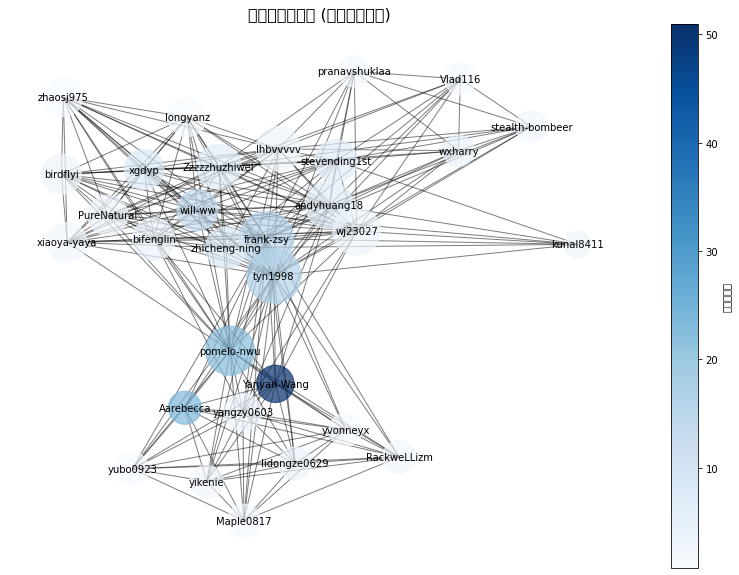

In [61]:
# a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况
import networkx as nx
import matplotlib.pyplot as plt
import json

# 读取数据
with open("C:/Users/86137/Desktop/hw4_data.json", 'r') as f:
    data = json.load(f)

# 用户节点
users = {user[0]: user[1] for user in data['nodes']}

# 边关系
edges = data['edges']

# 构建社交网络图
G = nx.Graph()

# 添加节点和边
for user in users.keys():
    G.add_node(user, influence=users[user])

for edge in edges:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

# 计算每个用户的度数
degree = dict(G.degree())

# 设置节点大小和颜色
sizes = [degree[user] * 100 for user in G.nodes()]  # 节点大小
colors = [users[user] for user in G.nodes()]  # 节点颜色（影响力得分）

# 设置绘图参数
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # 弹簧布局，调整k和iterations以改善布局

# 绘制网络图
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, cmap=plt.cm.Blues, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm.set_array([])
plt.colorbar(sm, label='影响力得分')

# 添加标题
plt.title("用户关系网络图 (关键用户展示)", fontsize=16)
plt.axis('off')  # 关闭坐标轴
plt.show()

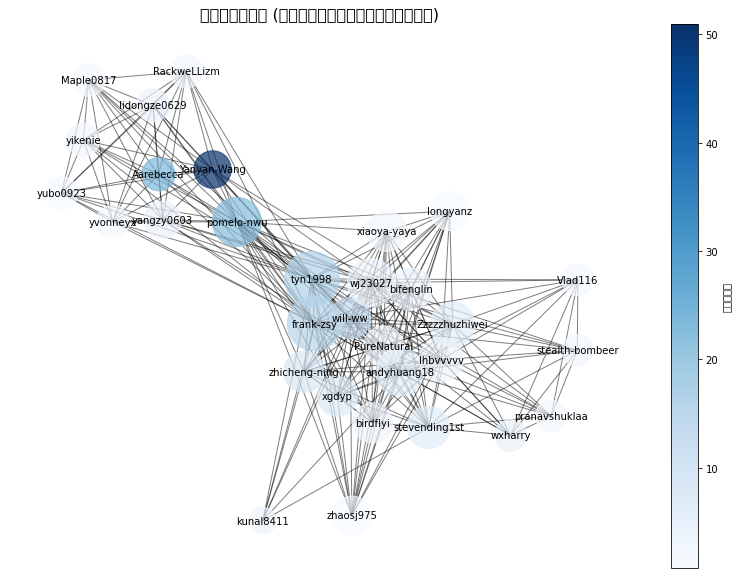

In [62]:
# b.按“影响力得分”进行着色
import networkx as nx
import matplotlib.pyplot as plt
import json

# 读取数据
with open("C:/Users/86137/Desktop/hw4_data.json", 'r') as f:
    data = json.load(f)

# 用户节点
users = {user[0]: user[1] for user in data['nodes']}

# 边关系
edges = data['edges']

# 构建社交网络图
G = nx.Graph()

# 添加节点和边
for user in users.keys():
    G.add_node(user, influence=users[user])

for edge in edges:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

# 计算每个用户的度数
degree = dict(G.degree())

# 设置节点大小和颜色
sizes = [degree[user] * 100 for user in G.nodes()]  # 节点大小
colors = [users[user] for user in G.nodes()]  # 节点颜色（影响力得分）

# 设置绘图参数
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # 弹簧布局

# 绘制网络图
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, cmap=plt.cm.Blues, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm.set_array([])
plt.colorbar(sm, label='影响力得分')

# 添加标题
plt.title("用户关系网络图 (按影响力得分着色，节点大小为度数)", fontsize=16)
plt.axis('off')  # 关闭坐标轴
plt.show()


b.Yanyan-Wang在图中最具影响力，但直接朋友并非最多。